<a href="https://colab.research.google.com/github/adviksharma25/diabetes-prediction/blob/main/AI_MAJOR_SEPTEMBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#displaying csv file already downloaded on the system
df = pd.read_csv(r"C:\Users\ADVIK\Downloads\diabetes_prediction_dataset.csv\diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [30]:
df.shape

(100000, 9)

In [31]:
df.size

900000

In [32]:
#Counting null values in dataset
def not_null(df, col):
  print("Null values in", col, ":", df[col].isna().sum())

for col in df.columns:
  not_null(df, col)  

Null values in gender : 0
Null values in age : 0
Null values in hypertension : 0
Null values in heart_disease : 0
Null values in smoking_history : 0
Null values in bmi : 0
Null values in HbA1c_level : 0
Null values in blood_glucose_level : 0
Null values in diabetes : 0


C:\Users\ADVIK\AppData\Local\Temp\ipykernel_27668\3032643503.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["diabetes"], palette="coolwarm")


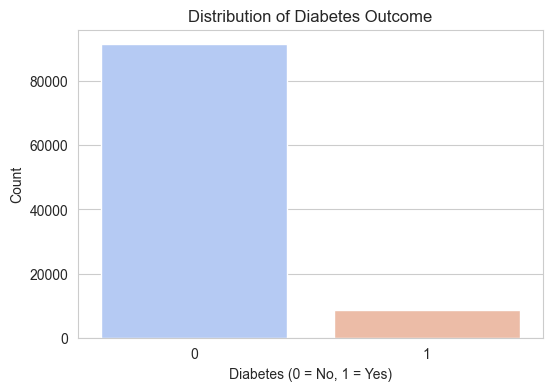

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df["diabetes"], palette="coolwarm")
plt.title("Distribution of Diabetes Outcome")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Check distribution of numerical variables
df.describe()


In [45]:
# Check unique values in categorical columns
df['gender'].value_counts(), df['smoking_history'].value_counts()


(gender
 0    58552
 1    41430
 2       18
 Name: count, dtype: int64,
 smoking_history
 0    35816
 4    35095
 3     9352
 1     9286
 5     6447
 2     4004
 Name: count, dtype: int64)

In [50]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'gender' and 'smoking_history'
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

# Verify encoding
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


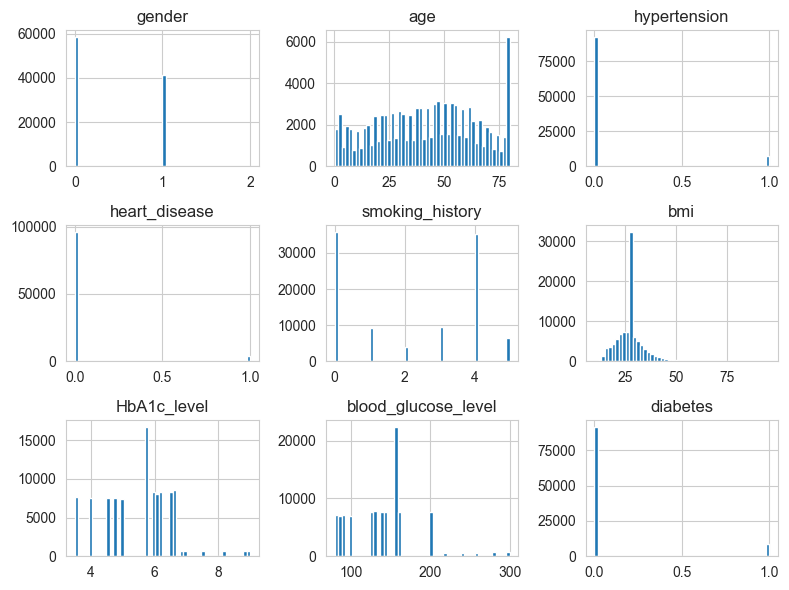

In [54]:
#Data Visualization
df.hist(bins=50, figsize = (8.0, 6.0))
plt.tight_layout()
plt.show()

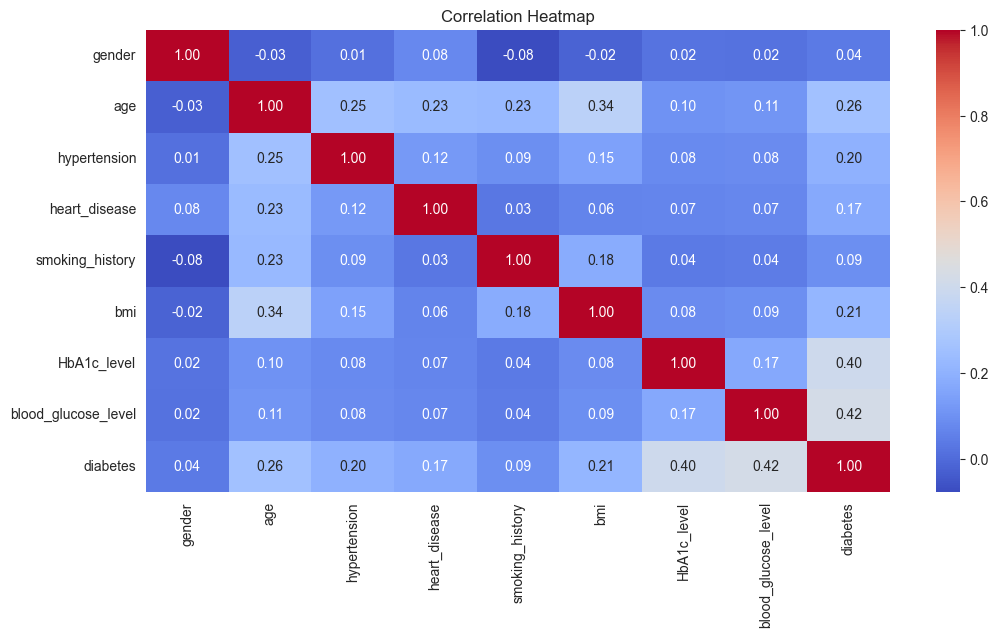

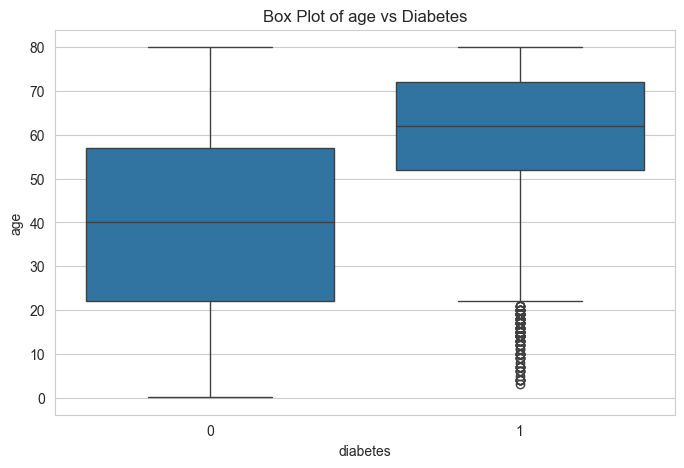

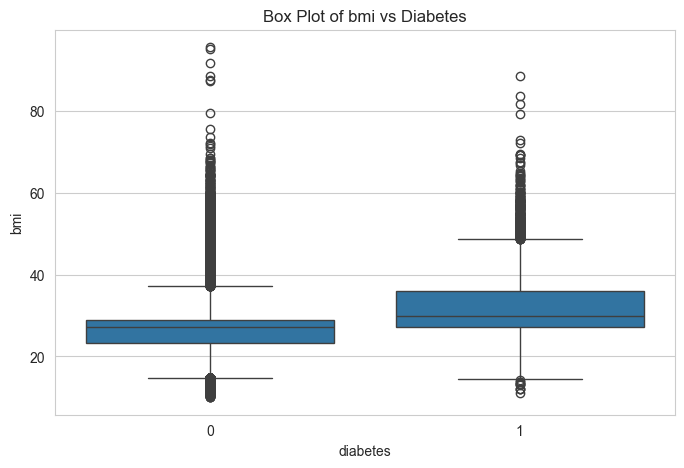

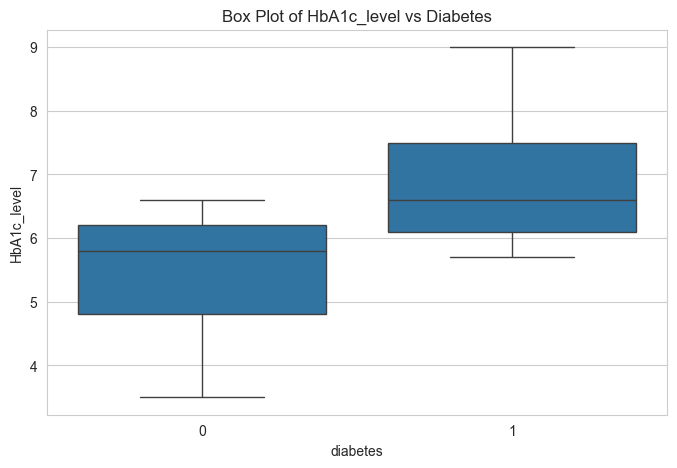

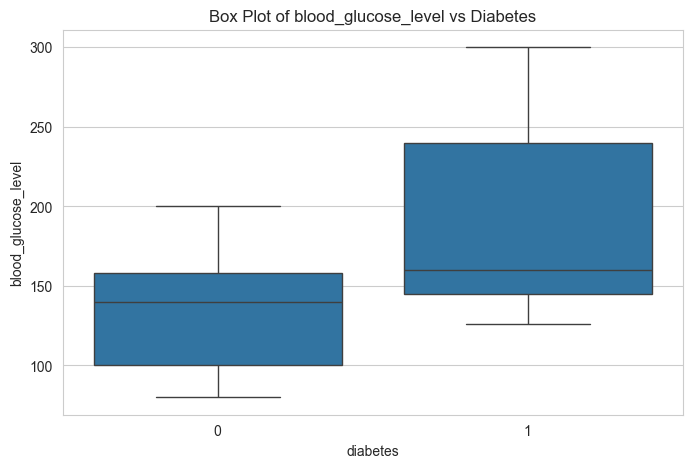

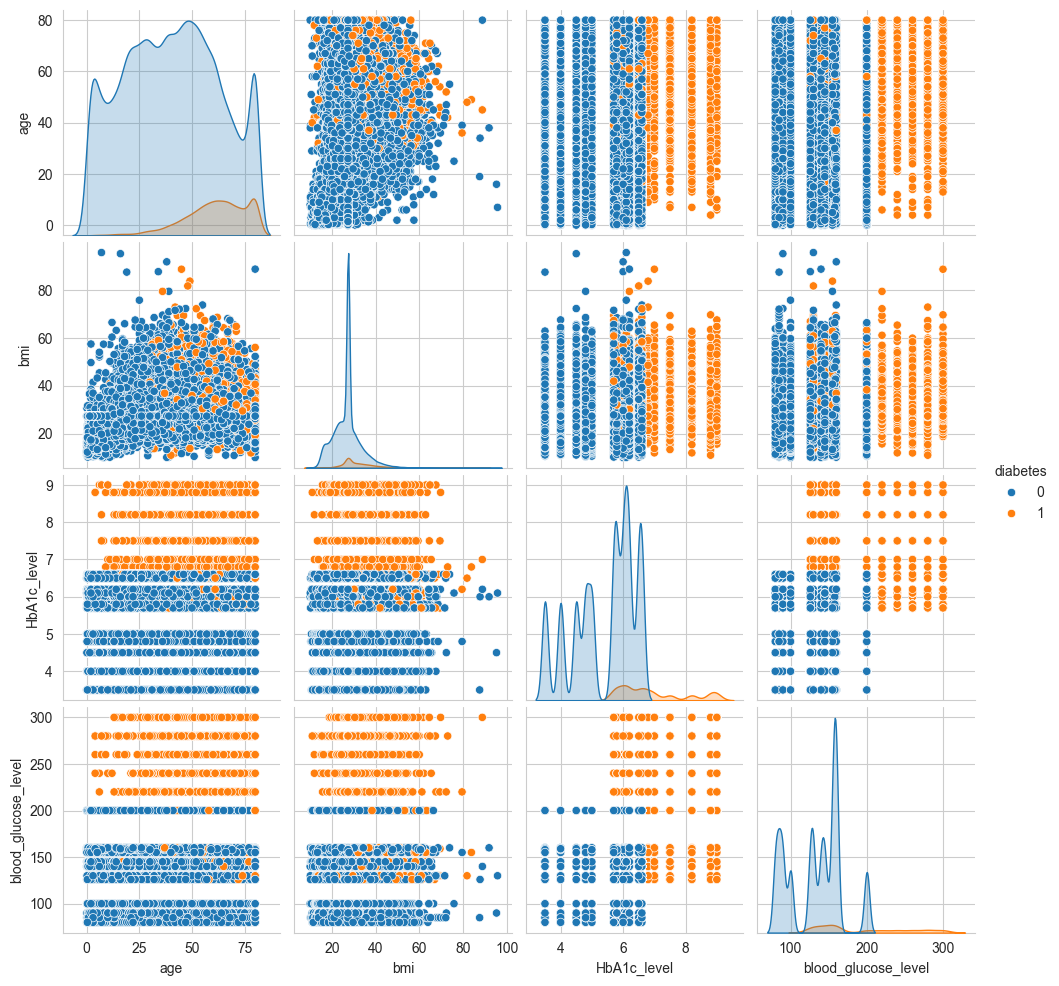

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Box plot for numerical features vs target
numerical_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["diabetes"], y=df[feature])
    plt.title(f"Box Plot of {feature} vs Diabetes")
    plt.show()

# Pairplot for selected features
sns.pairplot(df, hue="diabetes", vars=numerical_features, diag_kind="kde")
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features (X) and target variable (y)
X = df.drop(columns=['diabetes'])  # Features
y = df['diabetes']  # Target variable

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

# Train and evaluate models
performance_metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    performance_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Convert results into a DataFrame for easy comparison
import pandas as pd
performance_df = pd.DataFrame(performance_metrics).T
performance_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.95865,0.863749,0.612412,0.716684
Naïve Bayes,0.90475,0.458561,0.638173,0.533660
Decision Tree,0.95270,0.715986,0.739461,0.727535
Random Forest,0.97035,0.949234,0.689696,0.798915
SVC,0.96235,0.976072,0.573185,0.722243
